In [711]:
import pandas as pd
import numpy as np
import csv
import requests 
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Gather Data 

#### 1. Twitter Archive

In [712]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Image Predictions

In [713]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

file_name = os.path.basename(url)
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

image_predictions_df  = pd.read_csv(file_name, sep = "\t")
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3.Tweet JSON

In [714]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df_now = pd.DataFrame(df_list)

### Assessing Data

#### Archive

In [715]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Notes:**
- There are 181 retweets
- There are 78 replies 
- There are 2297 tweets with expanded_urls
- The timestamp field is in string format (object)
- There are 4 columns indicating dog stages (doggo, floofer, pupper, puppo)
- Retweets columns are not related to original tweets
- Replies columns are not related to original tweets


In [716]:
print("Timestamp column type:  {}".format(type(archive_df.timestamp[0])))

Timestamp column type:  <class 'str'>


In [717]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [718]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [719]:
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
985,749075273010798592,NaN,NaN,2016-07-02 03:00:36 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Boomer. He's self-baptizing. Other dog...,NaN,NaN,NaN,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo,None,None,None
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,None,None,None,None
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,None,None,None,None
1915,674318007229923329,NaN,NaN,2015-12-08 20:01:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's in quite the predicament....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674318007...,8,10,Lennon,None,None,pupper,None
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Perry. He's an Augustus Gloopster. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684902183...,11,10,Perry,None,None,None,None
416,822610361945911296,NaN,NaN,2017-01-21 01:02:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non-canines like this V...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822610361...,12,10,None,None,None,None,None


In [720]:
dogggo = archive_df.doggo.value_counts()
floofer = archive_df.floofer.value_counts()
pupper = archive_df.pupper.value_counts()
puppo = archive_df.puppo.value_counts()
print(dogggo)
print(floofer)
print(pupper)
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [721]:
archive_df[["text","name"]].sample(20)

,text,name
1300,This is Jiminus. He's in a tub for some reason...,Jiminus
1965,This is Gerald. He's a fluffy lil yellow pup. ...,Gerald
1643,Meet Sadie. She fell asleep on the beach and h...,Sadie
1271,This is Billy. He sensed a squirrel. 8/10 damn...,Billy
1562,This is Derby. He's a superstar. 13/10 (vid by...,Derby
1702,Say hello to Sadie. She's a Tortellini Sidewin...,Sadie
1470,This is Chester. He's a Benefloof Cumberbark. ...,Chester
1124,This is Ziva. She doesn't know how her collar ...,Ziva
1497,PUPDATE: just noticed this dog has some extra ...,None
690,This is Moose. He's rather h*ckin dangerous (y...,Moose


In [722]:
archive_df.name.value_counts().head(50)

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Daisy         7
Bailey        7
Toby          7
Buddy         7
Bella         6
Jax           6
Oscar         6
Scout         6
Stanley       6
Jack          6
Koda          6
Leo           6
Rusty         6
Dave          6
Milo          6
Alfie         5
very          5
Chester       5
Oakley        5
Phil          5
Sammy         5
Larry         5
Sunny         5
Gus           5
Louis         5
Finn          5
George        5
Bentley       5
Maggie        4
Ruby          4
Beau          4
Chip          4
Luna          4
Reginald      4
Gary          4
Maddie        4
Name: name, dtype: int64

In [723]:
archive_df[archive_df.name.str.contains('^[a-z]', regex= True)].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [724]:
sum(archive_df[ archive_df.name.str.contains('^[a-z]', regex= True)].name.value_counts())

109

**Notes**
- It appears that name column is extracted from text column
- name column values that are capitalized are real dog names 
- name column values that begin in lowercase are not dog names (a, the, light ,...)

In [725]:
archive_df[["rating_numerator", "rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [726]:
archive_df.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [727]:
sum(archive_df.rating_denominator != 10)

23

In [728]:
# ignore denominator that don't equal 10 and are not retweets or replies
mask_ignore_dem10 = (archive_df.rating_denominator != 10) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

archive_df[mask_ignore_dem10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [729]:
sum(mask_ignore_dem10)

17

In [730]:
archive_df.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [731]:
sum(archive_df.rating_numerator >= 15)

28

In [732]:
df_tweets_denom_10 = archive_df[archive_df.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [733]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

**Notes:**
- The max values are huge: 1776, 170.
- The minimum is 0 for rating_numerator and rating_denominator.
- Only 17 of rating_denominator values don't equal 10 and are not retweets nor replies
- Thare is only 28 values with rating_numerator above 15
- Thare is only 12 values with rating_numerator above 15 nd rating_denominator = 10

In [734]:
sum(archive_df.expanded_urls.isna())

59

#### Image Predictions

In [735]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [736]:
image_predictions_df.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [737]:
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [738]:
image_predictions_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [739]:
image_predictions_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [740]:
image_predictions_df[["p1_conf","p2_conf","p3_conf"]].sample(20)

,p1_conf,p2_conf,p3_conf
963,0.587764,0.281429,0.094798
520,0.265274,0.167614,0.117506
886,0.222943,0.179938,0.163033
1757,0.354823,0.245390,0.136545
533,0.628255,0.318646,0.013058
1807,0.988916,0.001677,0.001126
1183,0.808737,0.028942,0.026498
368,0.678046,0.160273,0.065649
746,0.957365,0.038559,0.000667
2002,0.575751,0.240970,0.088935


#### API JSON

In [741]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [742]:
api_df_now.head(20)

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


In [743]:
api_df_now.describe()

,favorite_count,retweet_count,tweet_id,user_count
count,2354.000000,2354.000000,2.354000e+03,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17,3.200942e+06
std,11814.771334,5284.770364,6.852812e+16,4.457302e+01
min,0.000000,0.000000,6.660209e+17,3.200799e+06
25%,1415.000000,624.500000,6.783975e+17,3.200898e+06
50%,3603.500000,1473.500000,7.194596e+17,3.200945e+06
75%,10122.250000,3652.000000,7.993058e+17,3.200953e+06
max,132810.000000,79515.000000,8.924206e+17,3.201018e+06


#### Assessment Summary

**Quality**

1. There are 2297 tweets with expanded_urls indicating 59 tweets with missing data.
2. There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
3. There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).
4. The name column has 109 invalid name values. Invalid words are all lowercase; all valid names start with an uppercase letter.
5. rating_denominator has some incosistent values it shows as high as 170 respectively. Ignoring replies and retweets, there are 17 tweets with rating_denominator not equal to 10.
6. There are 28 tweets with rating_numerator >= 15. The max value is 1776, When we only look at tweets with rating_denominator of 10, there are 12 tweets with rating_numerator >= 15.
7. Source column can be simplified by extracting string from `<a>` tag.
8. There are 2075 image predictions, 281 less than the number of tweets in the archive
9. Erroneous datatypes (timestamp, source, dog_stage, tweet_id)


**Tidiness**

1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo), which doesn't conform to the rules of "tidy data".
2. We are only interested in "original tweets", no "retweets"; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
3. Reply tweets are also not "original tweets", this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.
4. rating_denominators is no longer needed as values are the same (10).
5. The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.
6. The json_data table should be combined with the archive table.

### Clean Data

In [744]:
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

#### Quality #1
##### Define
> Drop tweets with missing data in the expanded_urls.
##### Code

In [745]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [746]:
archive_df_clean.expanded_urls.isnull().sum()

59

In [747]:
archive_df_clean = archive_df_clean[archive_df_clean.expanded_urls.notnull()]

##### Test

In [748]:
archive_df_clean.expanded_urls.isnull().sum()

0

#### Tidiness  #1.
There are 4 columns for dog stages: doggo, floofer, pupper, puppo.

##### Define
> Melt the 4 columns with the dog stages
##### Code

In [749]:
archive_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2297,2297,2297,2297
unique,2,2,2,2
top,None,None,None,None
freq,2203,2287,2042,2268


In [750]:
stages = ['doggo', 'pupper','floofer', 'puppo']
columns = [i for i in archive_df_clean.columns.tolist() if i not in stages]


archive_df_clean = pd.melt(archive_df_clean, id_vars = columns, value_vars = stages, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
archive_df_clean = archive_df_clean.drop('stages', 1)

##### Test

In [751]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 14 columns):
tweet_id                      9188 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     9188 non-null object
source                        9188 non-null object
text                          9188 non-null object
retweeted_status_id           720 non-null float64
retweeted_status_user_id      720 non-null float64
retweeted_status_timestamp    720 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9188 non-null int64
rating_denominator            9188 non-null int64
name                          9188 non-null object
dog_stage                     9188 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 1005.0+ KB


In [752]:
list(image_predictions_df_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [753]:
archive_df_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
4335,670778058496974848,NaN,NaN,2015-11-29 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""To bone or not to bone?""\n10/10 https://t.co/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670778058...,10,10,None,None
8444,686286779679375361,NaN,NaN,2016-01-10 20:41:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When bae calls your name from across the room....,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,None,None
8372,690597161306841088,NaN,NaN,2016-01-22 18:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,None
8437,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None
6160,685325112850124800,NaN,NaN,2016-01-08 05:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Tristan do not speak to me with that kind of ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685325112...,10,10,None,None
5906,704134088924532736,NaN,NaN,2016-02-29 02:40:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This sneezy pupper is just adorable af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/igW2OEwu9vg,12,10,None,None
2272,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None
6322,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None
788,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a doggo blowing bubbles....,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo
5405,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798...,10,10,None,None


#### Quality #2
##### Define
> Drop all rows containing retweets(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
##### Code

In [754]:
print("number of retweets:  {}".format(sum(archive_df_clean.retweeted_status_id.notnull())))

number of retweets:  720


In [755]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isna()]

##### Test

In [756]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 9187
Data columns (total 14 columns):
tweet_id                      8468 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8468 non-null object
source                        8468 non-null object
text                          8468 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8468 non-null object
rating_numerator              8468 non-null int64
rating_denominator            8468 non-null int64
name                          8468 non-null object
dog_stage                     8468 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 992.3+ KB


#### Quality #3
##### Define
> Drop all rows containing replies(in_reply_to_status_id , in_reply_to_user_id)
##### Code

In [757]:
print("Number of replies:  {}".format(sum(archive_df_clean.in_reply_to_status_id.notnull())))

Number of replies:  92


In [758]:
archive_df_clean = archive_df_clean[archive_df_clean.in_reply_to_status_id.isna()]

##### Test

In [759]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8376 entries, 0 to 9187
Data columns (total 14 columns):
tweet_id                      8376 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     8376 non-null object
source                        8376 non-null object
text                          8376 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8376 non-null object
rating_numerator              8376 non-null int64
rating_denominator            8376 non-null int64
name                          8376 non-null object
dog_stage                     8376 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 981.6+ KB


#### Tidiness #2
##### Define
> Since we don't want retweets, we can drop all columns related to retweets(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
##### Code

In [760]:
archive_df_clean = archive_df_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

##### Test

In [761]:
list(archive_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### Tidiness #3
##### Define
> Drop all columns related to replies: (in_reply_to_status_id, in_reply_to_user_id)
##### Code

In [762]:
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

##### Test

In [763]:
list(archive_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### Quality #4
##### Define
> Replace all lowercase words in the name column with the string "None".
##### Code

In [764]:
names_mask = archive_df_clean.name.str.contains('^[a-z]', regex = True)
archive_df_clean[names_mask].name.value_counts().sort_index()

a               220
actually          8
all               4
an               24
by                4
getting           8
his               4
incredibly        4
infuriating       4
just             12
life              4
light             4
mad               4
my                4
not               8
officially        4
old               4
one              16
quite            12
space             4
such              4
the              32
this              4
unacceptable      4
very             16
Name: name, dtype: int64

In [765]:
archive_df_clean.loc[names_mask, 'name'] = "None"

##### Test

In [766]:
archive_df_clean[names_mask].name.value_counts().sort_index()

None    416
Name: name, dtype: int64

#### Quality #5
##### Define
> Drop tweets with rating_denominator values that are NOT equal to 10.
##### Code

In [767]:
archive_df_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       4
150       4
120       4
110       4
90        4
80        8
70        4
50       12
40        4
20        4
11        8
10     8308
7         4
2         4
Name: rating_denominator, dtype: int64

In [768]:
archive_df_clean = archive_df_clean[archive_df_clean.rating_denominator == 10]

##### Test

In [769]:
archive_df_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    8308
Name: rating_denominator, dtype: int64

#### Quality #6
##### Define
> Drop tweets that have rating_numerator >= 15.
##### Code

In [770]:
mask = archive_df_clean.rating_numerator >= 15
archive_df_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    4
420     4
75      4
27      4
26      4
Name: rating_numerator, dtype: int64

In [771]:
archive_df_clean = archive_df_clean[archive_df_clean.rating_numerator < 15]

##### Test

In [772]:
archive_df_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     152
13    1148
12    1940
11    1652
10    1736
9      608
8      392
7      204
6      128
5      136
4       60
3       76
2       36
1       16
0        4
Name: rating_numerator, dtype: int64

#### Tidiness #4
##### Define
> - Drop the rating_denominator column.
> - Rename the rating_numerator column to rating.
##### Code

In [773]:
archive_df_clean.rating_denominator.value_counts()

10    8288
Name: rating_denominator, dtype: int64

In [774]:
archive_df_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_df_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

##### Test

In [775]:
list(archive_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'dog_stage']

#### Quality #7
##### Define
> Replace the source string with the string between `<a>` and `</a>`.
##### Code

In [776]:
archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     7764
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         364
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      120
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      40
Name: source, dtype: int64

In [777]:
archive_df_clean['source'] = archive_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [778]:
archive_df_clean.source.value_counts()

Twitter for iPhone     7764
Vine - Make a Scene     364
Twitter Web Client      120
TweetDeck                40
Name: source, dtype: int64

#### Tidiness  #5 and Quality #8
Note: This also solves Quality #8 issue, that there are fewer image predictions than tweets in the archive.

##### Define
> This is a 2-step process, first creating the columns in the predictions table, then merging to archive.

##### Code - Part 1

In [779]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

conditions = [(image_predictions_df_clean['p1_dog'] == True),
              (image_predictions_df_clean['p2_dog'] == True),
              (image_predictions_df_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [image_predictions_df_clean['p1'], 
                 image_predictions_df_clean['p2'],
                 image_predictions_df_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [image_predictions_df_clean['p1_conf'], 
                      image_predictions_df_clean['p2_conf'], 
                      image_predictions_df_clean['p3_conf']]

# select the predicted breed based on the first successful condition
image_predictions_df_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
image_predictions_df_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

##### Test - Part 1

In [780]:
image_predictions_df_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


##### Code - Part 2

In [781]:
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_df_clean = pd.merge(archive_df_clean, image_predictions_df_clean[mask_cols],
                     on = 'tweet_id', how = 'inner')

archive_df_clean.confidence = (archive_df_clean.confidence * 100).astype(int)

image_predictions_df_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

##### Test - Part 2

In [782]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 10 columns):
tweet_id         7796 non-null int64
timestamp        7796 non-null object
source           7796 non-null object
text             7796 non-null object
expanded_urls    7796 non-null object
rating           7796 non-null int64
name             7796 non-null object
dog_stage        7796 non-null object
breed            7796 non-null object
confidence       7796 non-null int64
dtypes: int64(3), object(7)
memory usage: 670.0+ KB


In [783]:
archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0
1,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0
2,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0
3,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0
4,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,Chihuahua,32


In [784]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [785]:
list(image_predictions_df_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Tidiness #6.

##### Define
> Merge the retweet_count, favorite_count and user_count columns to the archive table, joining on tweet_id.


##### Code

In [786]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [787]:
archive_df_clean = pd.merge(archive_df_clean, api_df_now, 
                         on = 'tweet_id', how = 'left')

##### Test

In [788]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 13 columns):
tweet_id          7796 non-null int64
timestamp         7796 non-null object
source            7796 non-null object
text              7796 non-null object
expanded_urls     7796 non-null object
rating            7796 non-null int64
name              7796 non-null object
dog_stage         7796 non-null object
breed             7796 non-null object
confidence        7796 non-null int64
favorite_count    7796 non-null int64
retweet_count     7796 non-null int64
user_count        7796 non-null int64
dtypes: int64(6), object(7)
memory usage: 852.7+ KB


#### Quality  #9.

##### Define
> Change datatypes of timestamp to datetime, dog_stage to categorical, tweet_id to string.


##### Code

In [789]:
archive_df_clean.dog_stage = archive_df_clean.dog_stage.astype('category')
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype('str')

##### Test

In [790]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 13 columns):
tweet_id          7796 non-null object
timestamp         7796 non-null datetime64[ns]
source            7796 non-null object
text              7796 non-null object
expanded_urls     7796 non-null object
rating            7796 non-null int64
name              7796 non-null object
dog_stage         7796 non-null category
breed             7796 non-null object
confidence        7796 non-null int64
favorite_count    7796 non-null int64
retweet_count     7796 non-null int64
user_count        7796 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(6)
memory usage: 799.6+ KB


### Store

In [791]:
archive_df_clean.to_csv('twitter_archive_master.csv', index = False)

In [792]:
ls *.csv

twitter-archive-enhanced.csv  twitter_archive_master.csv


In [793]:
pd.read_csv('twitter_archive_master.csv').head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,breed,confidence,favorite_count,retweet_count,user_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0,39467,8853,3200889
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0,39467,8853,3200889
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0,39467,8853,3200889
3,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,none,0,39467,8853,3200889
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,Chihuahua,32,33819,6514,3200889


### Analyze and Visualize Data

In [794]:
plt.rcParams['figure.figsize'] = (14, 9)

In [795]:
we_rate_dogs = archive_df_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 13 columns):
tweet_id          7796 non-null object
timestamp         7796 non-null datetime64[ns]
source            7796 non-null object
text              7796 non-null object
expanded_urls     7796 non-null object
rating            7796 non-null int64
name              7796 non-null object
dog_stage         7796 non-null category
breed             7796 non-null object
confidence        7796 non-null int64
favorite_count    7796 non-null int64
retweet_count     7796 non-null int64
user_count        7796 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(6)
memory usage: 799.6+ KB


In [796]:
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 16:23:56'))

In [797]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,7796.000000,7796.000000,7796.000000,7796.000000
mean,10.538225,2784.492560,8972.254489,46.119548
std,2.174245,4709.034175,12311.594808,33.825642
min,0.000000,16.000000,81.000000,0.000000
25%,10.000000,624.000000,1957.000000,14.000000
50%,11.000000,1360.000000,4144.000000,46.000000
75%,12.000000,3240.000000,11416.000000,77.000000
max,14.000000,79515.000000,132810.000000,99.000000


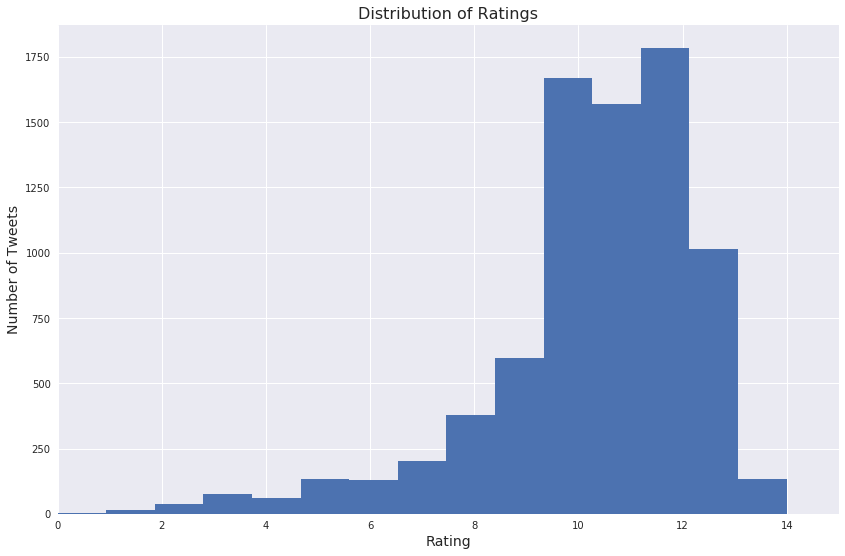

In [798]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.gcf()
plt.savefig('genertaed_figures/ratings_distribution.png')
plt.show();

**What is the most common stage?**

In [799]:
we_rate_dogs.dog_stage.value_counts()


None       7484
pupper      208
doggo        73
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [800]:
message = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(message.format(none_count, round(none_perc)))

message = "Number of distinct breeds:  {}"
print(message.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  1208 (15%)
Number of distinct breeds:  113


**What is the most favourited tweet to date? Top 5**

In [801]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,breed,confidence,favorite_count,retweet_count,user_count
1227,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,Lakeland_terrier,19,132810,48265,3200894
1224,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,None,Lakeland_terrier,19,132810,48265,3200894
1225,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,None,Lakeland_terrier,19,132810,48265,3200894
1226,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,None,Lakeland_terrier,19,132810,48265,3200894
3052,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,Labrador_retriever,82,131075,79515,3200943


**What is the most retweeted tweet to date? Top 5**

In [802]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,breed,confidence,favorite_count,retweet_count,user_count
3055,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,None,Labrador_retriever,82,131075,79515,3200943
3053,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,None,Labrador_retriever,82,131075,79515,3200943
3052,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,Labrador_retriever,82,131075,79515,3200943
3054,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,None,Labrador_retriever,82,131075,79515,3200943
1583,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,None,Chihuahua,50,107015,56625,3200896


In [803]:
top10_breeds_count = we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      612
Labrador_retriever    412
Pembroke              376
Chihuahua             356
pug                   248
toy_poodle            200
chow                  188
Samoyed               168
Pomeranian            160
malamute              132
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


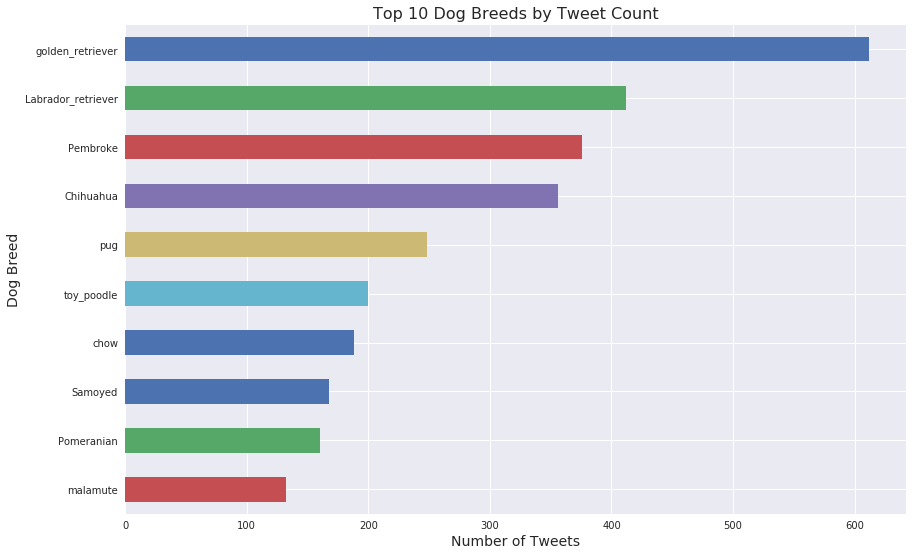

In [804]:
top10_breeds_count.plot(kind='barh')
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.xlabel('Number of Tweets', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 14)
plt.gca().invert_yaxis()
plt.savefig('genertaed_figures/top10_dog_breeds_tweet_count.png');

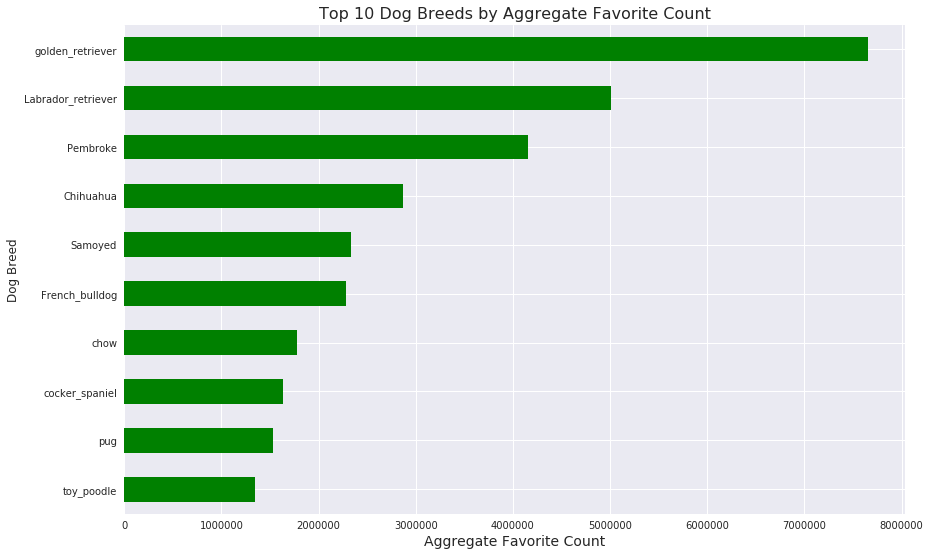

In [805]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts.plot(kind='barh', color='g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.savefig('genertaed_figures/top10_dog_breeds_fav_count.png');

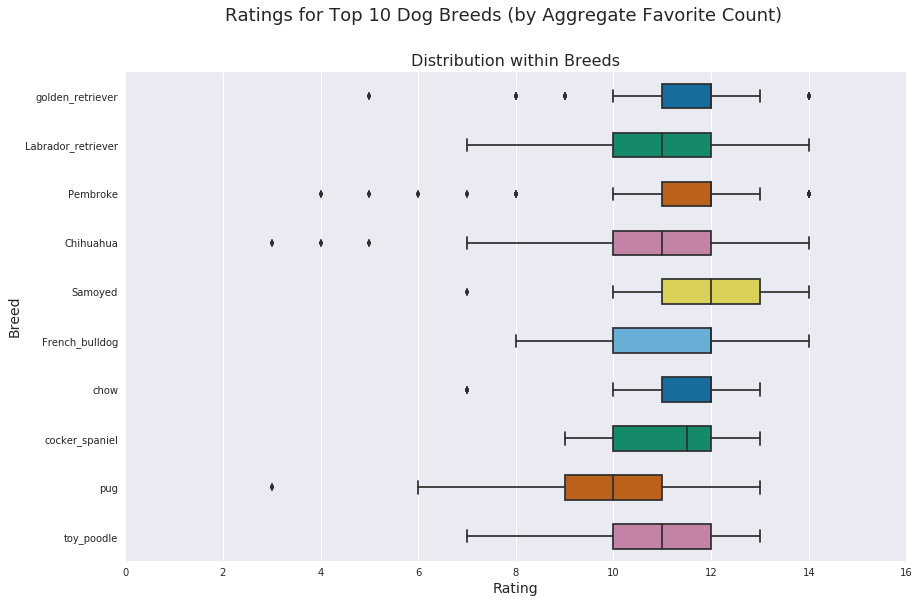

In [806]:
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
plt.gcf()
plt.savefig('genertaed_figures/top10_dog_breeds_dist_fav_count.png');
plt.show()